# Province Floating Population

Data Source: https://www.kaggle.com/kimjihoo/coronavirusdataset

In [1]:
import pandas as pd

In [2]:
float_df = pd.read_csv('./data/SeoulFloating.csv', index_col='date')
float_df

,hour,birth_year,sex,province,city,fp_num
date,,,,,,
2020-01-01,0,20,female,Seoul,Dobong-gu,19140
2020-01-01,0,20,male,Seoul,Dobong-gu,19950
2020-01-01,0,20,female,Seoul,Dongdaemun-gu,25450
2020-01-01,0,20,male,Seoul,Dongdaemun-gu,27050
2020-01-01,0,20,female,Seoul,Dongjag-gu,28880
...,...,...,...,...,...,...
2020-05-31,21,40,female,Seoul,Dobong-gu,27620
2020-05-31,21,40,female,Seoul,Songpa-gu,56560
2020-05-31,21,50,female,Seoul,Gangdong-gu,38960


<AxesSubplot:title={'center':'Floating Population by City (7 day Average)'}, xlabel='date'>

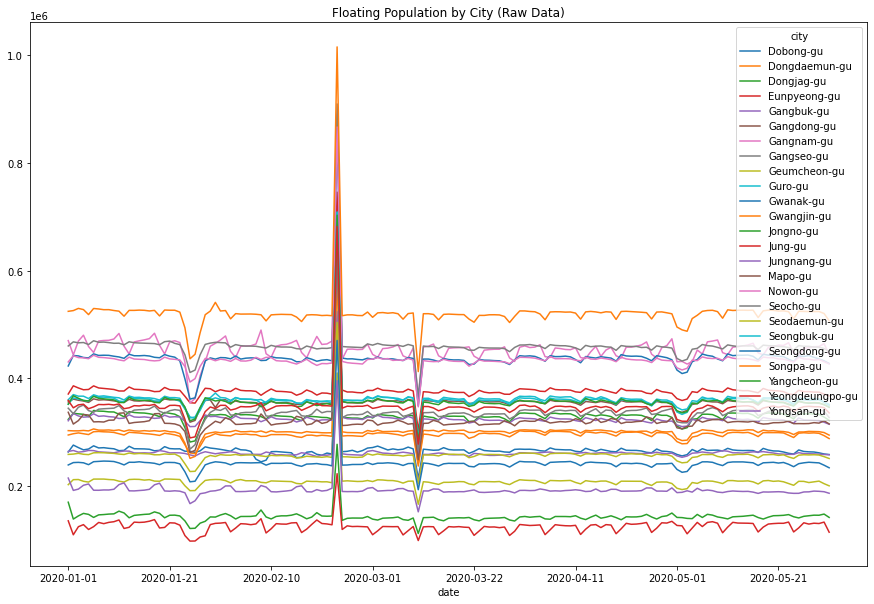

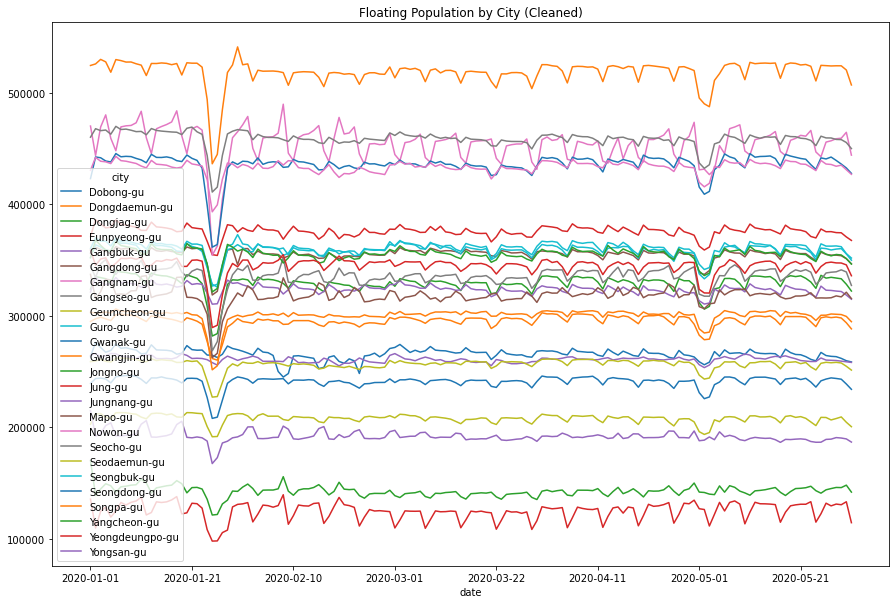

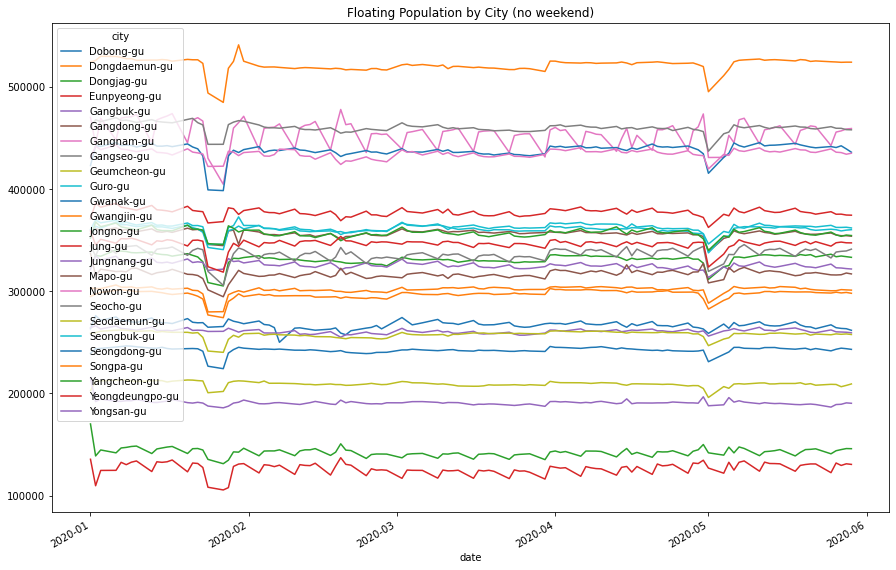

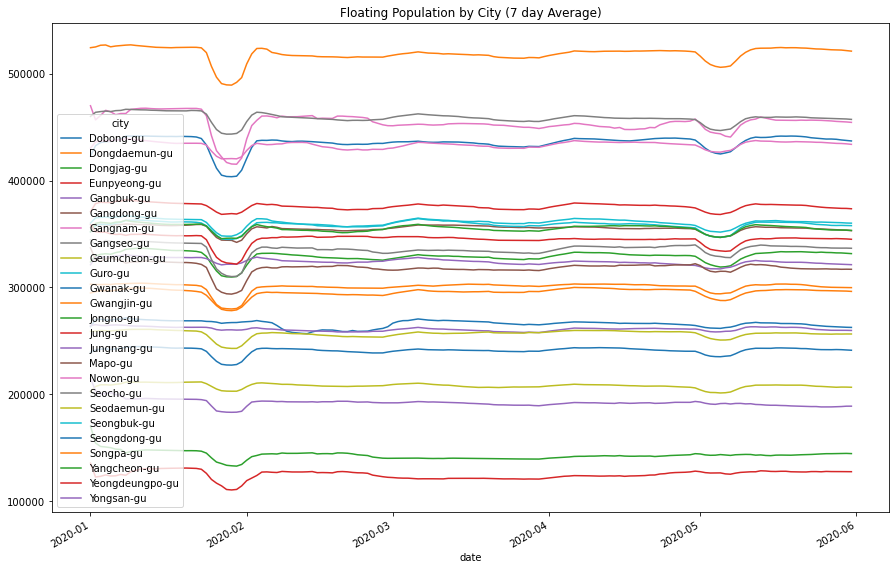

In [3]:
# Look at population by city (only 0th hour)
city_df = float_df[float_df['hour'] == 0].reset_index().groupby(['city','date'])['fp_num'].sum()
city_df = pd.DataFrame(city_df).reset_index().set_index('date').pivot(columns='city', values='fp_num')
city_df.plot(figsize=(15,10), title='Floating Population by City (Raw Data)')
# Look at those spikes!  Bad data?  Probably!

# 2020-02-23 looks to have the data doubled for some reason
# 2020-03-11 looks to be 25.5% lower, we'll clean this
city_df['2020-02-23':'2020-02-23'] = city_df['2020-02-23':'2020-02-23'] / 2
city_df['2020-03-11':'2020-03-11'] = city_df['2020-03-11':'2020-03-11'] * 1.255
city_df.plot(figsize=(15,10), title='Floating Population by City (Cleaned)')
# That looks a lot better!

# Look at only weekdays
city_df.index = pd.to_datetime(city_df.index)
city_df[city_df.index.dayofweek < 5].plot(figsize=(15,10), title='Floating Population by City (no weekend)')

# Look at 7 day average (including weekends)
city_df.rolling('7d').mean().plot(figsize=(15,10), title='Floating Population by City (7 day Average)')

<AxesSubplot:title={'center':'Floating Population by Age Group (7 day Average)'}, xlabel='date'>

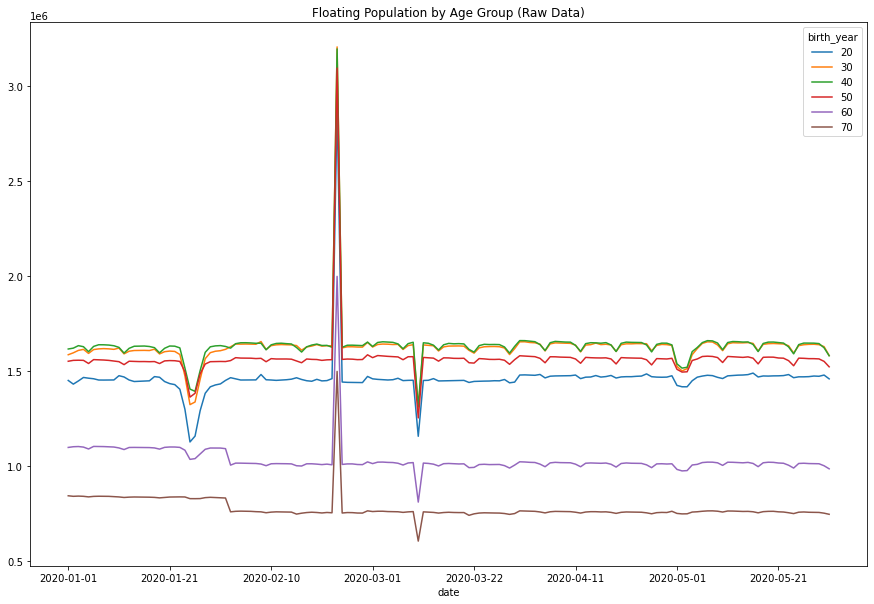

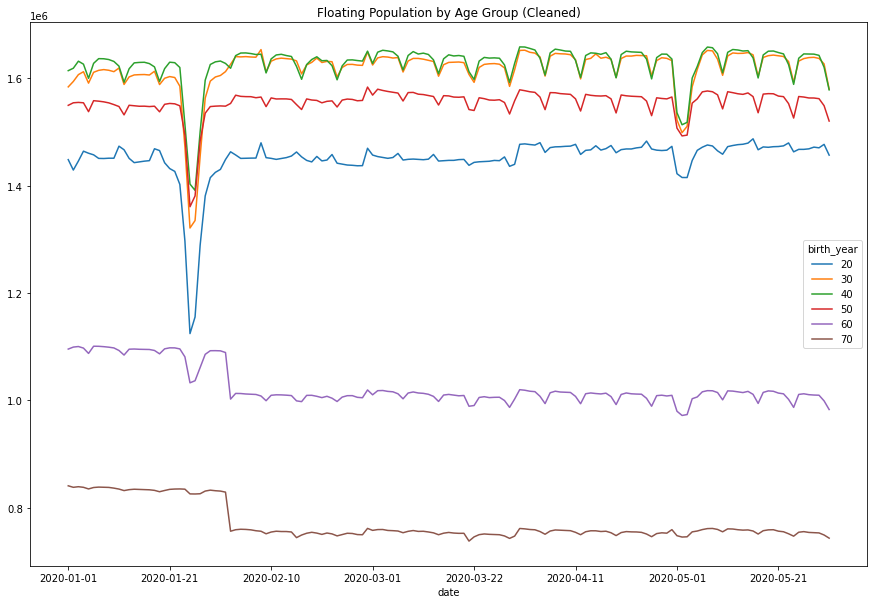

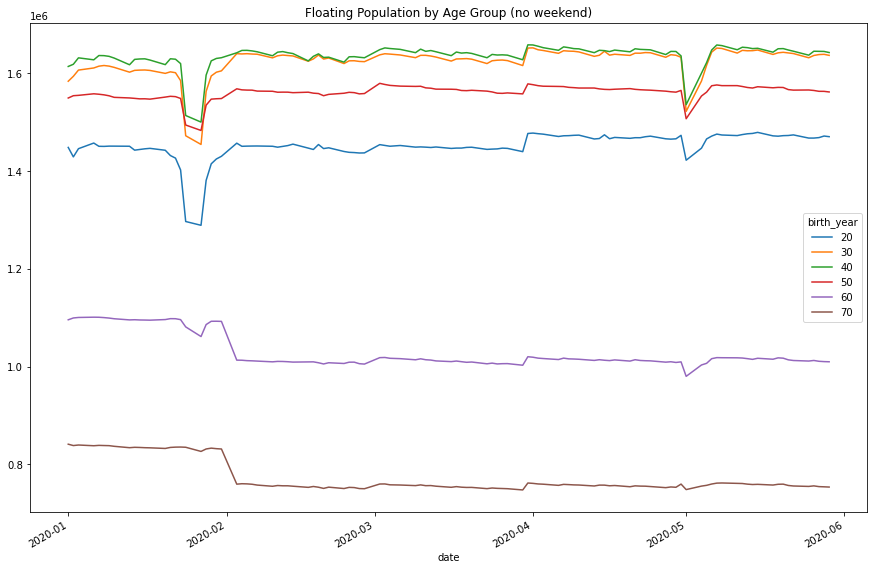

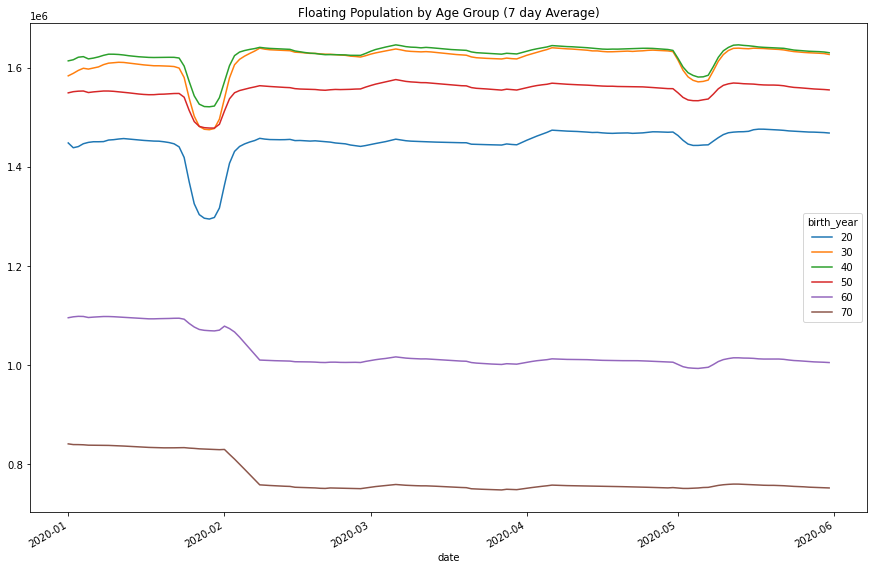

In [4]:
# Look at population by city (only 0th hour)
age_df = float_df[float_df['hour'] == 0].reset_index().groupby(['birth_year','date'])['fp_num'].sum()
age_df = pd.DataFrame(age_df).reset_index().set_index('date').pivot(columns='birth_year', values='fp_num')
age_df.plot(figsize=(15,10), title='Floating Population by Age Group (Raw Data)')
# Look at those spikes!  Bad data?  Probably!

# 2020-02-23 looks to have the data doubled for some reason
# 2020-03-11 looks to be 25.5% lower, we'll clean this
age_df['2020-02-23':'2020-02-23'] = age_df['2020-02-23':'2020-02-23'] / 2
age_df['2020-03-11':'2020-03-11'] = age_df['2020-03-11':'2020-03-11'] * 1.255
age_df.plot(figsize=(15,10), title='Floating Population by Age Group (Cleaned)')
# That looks a lot better!

# Look at only weekdays
age_df.index = pd.to_datetime(age_df.index)
age_df[age_df.index.dayofweek < 5].plot(figsize=(15,10), title='Floating Population by Age Group (no weekend)')

# Look at 7 day average (including weekends)
age_df.rolling('7d').mean().plot(figsize=(15,10), title='Floating Population by Age Group (7 day Average)')

<AxesSubplot:title={'center':'Floating Population by Gender (7 day Average)'}, xlabel='date'>

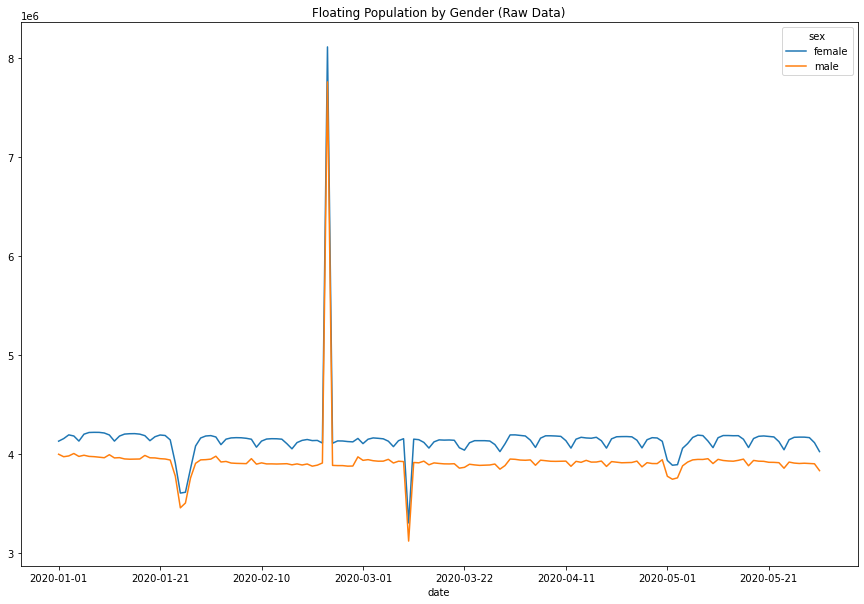

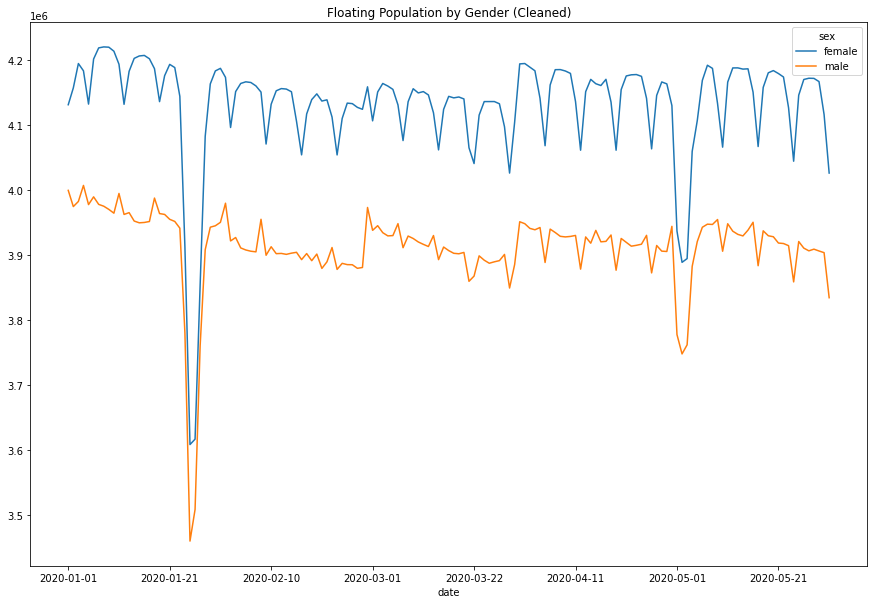

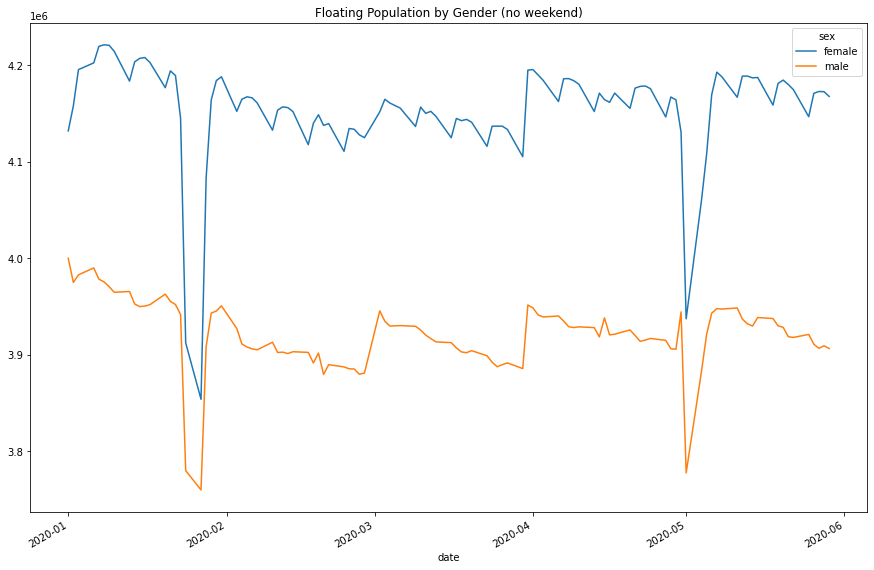

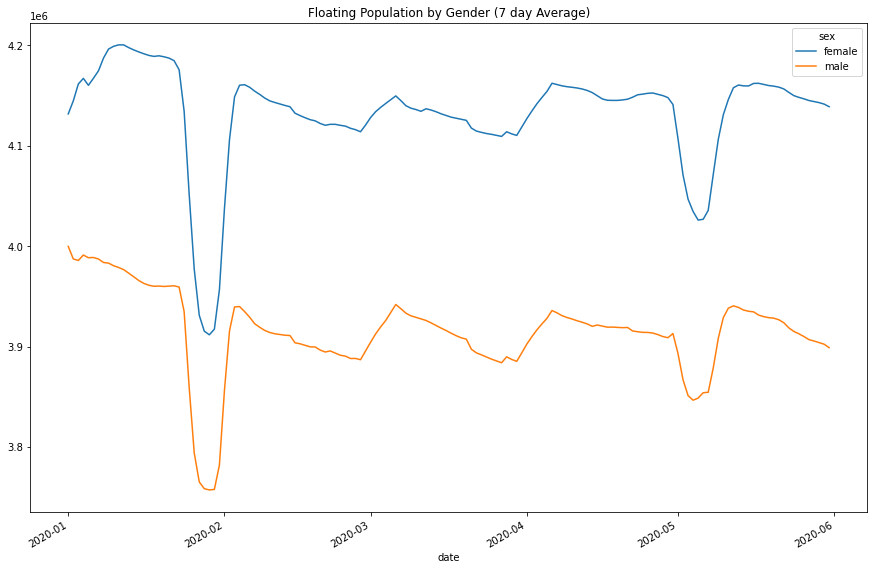

In [5]:
# Look at population by city (only 0th hour)
gender_df = float_df[float_df['hour'] == 0].reset_index().groupby(['sex','date'])['fp_num'].sum()
gender_df = pd.DataFrame(gender_df).reset_index().set_index('date').pivot(columns='sex', values='fp_num')
gender_df.plot(figsize=(15,10), title='Floating Population by Gender (Raw Data)')
# Look at those spikes!  Bad data?  Probably!

# 2020-02-23 looks to have the data doubled for some reason
# 2020-03-11 looks to be 25.5% lower, we'll clean this
gender_df['2020-02-23':'2020-02-23'] = gender_df['2020-02-23':'2020-02-23'] / 2
gender_df['2020-03-11':'2020-03-11'] = gender_df['2020-03-11':'2020-03-11'] * 1.255
gender_df.plot(figsize=(15,10), title='Floating Population by Gender (Cleaned)')
# That looks a lot better!

# Look at only weekdays
gender_df.index = pd.to_datetime(gender_df.index)
gender_df[gender_df.index.dayofweek < 5].plot(figsize=(15,10), title='Floating Population by Gender (no weekend)')

# Look at 7 day average (including weekends)
gender_df.rolling('7d').mean().plot(figsize=(15,10), title='Floating Population by Gender (7 day Average)')

## Conclusion

The data isn't very cleaned and even after cleaning, contains strange drops that quickly recover.  Some drops might be explainable due to regular migrations of people but I'm not sure that's the case here.  I don't really konw what would cause these irregular changes in population.